<a href="https://colab.research.google.com/github/berrehalbadr/Applied-Data-Science-Course-in-the-Oil-and-Gas-Industry/blob/main/Course%20Notebooks/03-%20Dealing%20with%20data%20(Your%2080%25%20work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Applied Data Science in the Oil and Gas Industry *(Tutorial: 3)*

---
### Badr Eddine Berrehal (Petroleum Engineer & Data Detective)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license
---

# Notebook Content

- **What's this about**
- **Loading data into python**
    - Text (.txt)
    - Comma Separated Values (.csv)
    - Excel Workbook (.xlsx)
    - LASer (.las)
    - XML & WISTML (.xml)
    - SEGY (.segy)
    - HyperText Markup Language (.html)
    - Digital Log Interchange Standard (.dlis)
- **Data Pre-processing**
    - Data navigation and wrangling
        - Selecting specific instances based on index(es) or condition(s)
        - Modifying index
        - Replacing values
        - Renaming columns
        - Finding statistical measures
        - Finding unique values and counting them
        - Checking for missing values
        - Deleting columns and rows
        - Removing data duplicates
        - Grouping a DataFrame by a variable or a list of them
        - Applying a function over a column of data
        - Data merging
    - Numerical data handling
        - Handling missing data
        - Rescaling, Standardizing, Normalizing observations
        - Outliers detection and handling
    - Categorical data handling
        - Encoding Nominal Categorical Features
        - Encoding Ordinal Categorical Features
        - Imputing Missing Class Values
        - Handling Imbalanced Classes
    - Handling dates and times
        - Converting Strings to Dates
        - Selecting Dates and Times
        - Breaking Up Date Data into Multiple Features
        - Calculating the Difference Between Dates
        - Encoding Days of the Week
        - Creating a Lagged Feature
        - Using Rolling Time Windows
        - Handling Missing Data in Time Series

# 1. What's this about
Now that we have a quick introduction to the most commonly used python methods and concepts, we'll start focusing on the real purpose of the program. Analyzing data and building reliable machine learning models. It should be noted that while a good understanding of these concepts is the key to an efficient and bug-free experience. Most of the time in creating these projects will be spent using pre-implemented code created by a community of experts, which we briefly touched on in the previous notebook, namely **Libraries**.

This notebook enters under the third part of a common data science prorject workflow discussed in the first notebook. And when I say (**80% of the work**) this isn't an overstatement, and that is for two main reasons:
- In general, the data collected or provided for a DS project is generally unprocessed (dirty), it may include non-compliant or erroneous instances due to measurement or human interference.
- Data may be incomplete or instances may be lacking. You may need to fill in the gaps from different sources depending on your end goal.
- The quality of the work done in this section will directly dictate the final performance of your machine learning models as well as their reliability.

That is why, in this notebook, we will see how to read the most common data formats and how to adapt them to our needs.

## Note:
- This notebook is not intended to be used cell by cell, but think of it as a reference to use in your specific case, just as you would use a cookbook.

In [1]:
# Lets import all the libreries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import segyio # Deals with SEG-Y files such as geophysic survies
import xarray as xr
import lasio # Deals with LAS files such as well log data
import xml.etree.ElementTree as et # Deals with hierarchal data such as XML files, as in Daily Drilling Reports
from bs4 import BeautifulSoup # Deals with browser related data, such as HTML
from dlisio import dlis # Deals with .dlis files
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer # Used for preprocessing
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer # Encoding labels
from sklearn.impute import SimpleImputer # simple imputation method for missing data

%matplotlib inline
# comment out the following if you're not on a Mac with HiDPI display
%config InlineBackend.figure_format = 'retina'

If you're using this notebook on you local computer, it's very likely that you wouldn't have some of this libreries. So, simply use the *pip* command to install them in the next bloc. You only need to install them, so once you're done, comment them ou using #.

In [2]:
# Install the libs
#!pip install segyio
#!pip install lasio
#!pip install xml
#!pip install bs4

___

# 2. Read-in the different data formats
In the oil and gas industry, there are a plethora of data formats. We will review the most common ones. From there we'll transform them to a more suitable format which would allow us to operate on it with full ease, spoiler alert that suitable format is called a **Pandas DataFrame**.

- [Pandas](https://pandas.pydata.org/): is the most popular Python library that is used for data analysis with support for fast, flexible, and expressive data structures designed to work on both “relational” or “labeled” data. Pandas today is an inevitable library for solving practical, real-world data analysis in Python.
- A Pandas **DataFrame**: is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

## 2.1 Text (.txt)

In [3]:
# read text file into pandas DataFrame
df_text = pd.read_csv("Data/Volve production data.txt", delimiter="\t") # \t is for Tab Separated
df_text

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,4,228.0,"11,142","1,597,937",0,NaN,NaN
1,15/9-F-1 C,7405,2014,5,734.0,"24,902","3,496,230",783,NaN,NaN
2,15/9-F-1 C,7405,2014,6,706.0,"19,618","2,886,662","2,068",NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.0,"15,086","2,249,366","6,244",NaN,NaN
4,15/9-F-1 C,7405,2014,8,433.0,"6,970","1,048,191","4,530",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769,2016,5,732.0,"9,724","1,534,677","3,950",NaN,0
522,15/9-F-5,5769,2016,6,718.0,"9,121","1,468,557","2,377",NaN,NaN
523,15/9-F-5,5769,2016,7,669.0,"9,985","1,602,674","2,454",NaN,0
524,15/9-F-5,5769,2016,8,608.0,"8,929","1,417,279","2,372",NaN,0


## 2.2 Comma Separated Values (.csv)

In [4]:
# read csv file into pandas DataFrame
df_csv = pd.read_csv("Data/Volve production data.csv") # \t is for Tab Separated
df_csv

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,15/9-F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,15/9-F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,15/9-F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,15/9-F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,15/9-F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,15/9-F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


## 2.3 Excel Workbook (.xlsx)

In [5]:
# read xlsx or xls file into pandas DataFrame
df_xlsx = pd.read_excel("Data/Volve production data.xlsx") # you can define the number of the excell sheet if you have multiple or by name
df_xlsx

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,4,227.50000,11142.47,1597936.65,0.00,NaN,NaN
1,15/9-F-1 C,7405,2014,5,733.83334,24901.95,3496229.65,783.48,NaN,NaN
2,15/9-F-1 C,7405,2014,6,705.91666,19617.76,2886661.69,2068.48,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.41666,15085.68,2249365.75,6243.98,NaN,NaN
4,15/9-F-1 C,7405,2014,8,432.99166,6970.43,1048190.80,4529.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769,2016,5,732.00000,9724.40,1534677.16,3949.90,NaN,0.0
522,15/9-F-5,5769,2016,6,718.41667,9121.48,1468557.12,2376.93,NaN,NaN
523,15/9-F-5,5769,2016,7,668.64168,9985.29,1602674.39,2453.71,NaN,0.0
524,15/9-F-5,5769,2016,8,608.42500,8928.90,1417278.51,2371.86,NaN,0.0


## 2.4 LASer (.las)
The LAS (LASer) format is a file format designed for the interchange and archiving of lidar point cloud data. It is an open, binary format specified by the American Society for Photogrammetry and Remote Sensing (ASPRS). 

This particular type of file is usually encountered when it comes to well logs, as they usually contain the data recorder as well as some metadata (information about the data itself) such as the company, well ID, coordinates and a description of the parameters. You can open it with a simple text editor and check its structure.
For .las filles there's a better way to read-in the data than using Pandas text function, so for this particular format will use the [lasio](https://lasio.readthedocs.io/en/v0.29/#:~:text=lasio%20is%20a%20Python%203%20package%20to%20read,specification%2C%20published%20by%20the%20Canadian%20Well%20Logging%20Society.) Lib which provides more utility in respect to well logs.

In [6]:
# If the library ain't available you can install it with a simple pip function
#!pip install lasio

In [7]:
# lasio.read function reads the las file but it's not a DataFrame
las = lasio.read("Data/Well_log.las")

In [8]:
# Now let's check the well metadata
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

Top Depth (STRT): 102.1568
Bottom Depth (STOP): 4636.514
Depth Increment (STEP): 0.1524
Null Value (NULL): -999.25
Field Name (FLD): Q15
NAME (WELL): 15/9-19
WELLBORE (WBN): 15/9-19 SR
COUNTRY (NATI): NOR
COUNTRY (CTRY): NOR
OPERATOR (COMP): STATOIL
PERM DATUM (PDAT): MSL
RIG NAME (COUN): NORTH SEA
STATE (STAT): NORWAY
PB WELL ID (PBWE): 15/9-19
PB WELLBORE ID (APIN): 15/9-19 SR
PB WELL NAME SET (PBWS): ALL


In [9]:
# We can look at the curves recorded as well
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: M, Description: 1  DEPTH
Curve: AC, Units: US/F, Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, Units: IN, Description: 3  Caliper
Curve: DEN, Units: G/CC, Description: 4  Bulk Density
Curve: GR, Units: GAPI, Description: 5  Gamma Ray
Curve: NEU, Units: %, Description: 6  Neutron Porosity
Curve: RDEP, Units: OHMM, Description: 7  Deep Resistivity
Curve: RMED, Units: OHMM, Description: 8  Medium Resistivity
There are a total of: 8 curves present within this file


In [10]:
# And we can now convert it to a simple DataFrame and display it using .df()
df_las = las.df()
df_las

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


As you can see a lot of **NaN** values which means "Not a Number", but that simply says that the parameter haven't been recorded there, and well see how to deal with them latter.

## 2.5 XML & WISTML (.xml)
**Extensible Markup Language** (**XML**) is a markup language and file format for storing, transmitting and reconstructing arbitrary data. It defines a set of rules for encoding documents in a format that is both human and machine readable.

**Well-Site Information Transfer Standard Markup Language** (**WISTML**) is a standard for the transmission of well-site data from the rig to the various stakeholders in the oil and gas industry, and is itself an XML-based specification although more specific to O&G.

This type of data is typically encountered when dealing with well data, such as **Daily Drilling Reports** (DDR), **Real Time Drilling Data** (RTDD), **Logging While Drilling** (LWD) etc.
They tend to be processed in large batches and not one file at a time and require a good understanding of the file content in general to be able to extract the desired information, using accurate **Tags**. These files can be viewed using a web browser.

There are multiple Libraries which can be used to deal with this type, amidts the most known are:
- [xml.etree.ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html)
- [bs4.BeautifulSoup](https://pypi.org/project/beautifulsoup4/)

In [11]:
file="Data/DDR.xml"

In [12]:
# Reading the data inside the xml
# file to a variable under the name data, but displying will just give a loooooong text
with open('Data/DDR.xml', 'r') as f:
    data = f.read()
    
# Making a soup, meaning creating a readble and usable format for the data
soup = BeautifulSoup(data, 'lxml')

# Now let's look up all the tags available in this report
set([str(tag.name) for tag in soup.find_all()])

# Let's check the comments tag
soup.find_all('witsml:comments')

[<witsml:comments>Installed autoslips.
 </witsml:comments>,
 <witsml:comments>Continued RIH with 8½ BHA on 5" DP from 99m to 303m. Filled string every 300m. Trip time 407 m/hour.
 </witsml:comments>,
 <witsml:comments>Filled string, empty trip tank. Made up x-over to string and test MWD tools, 1600 lpm. Good. Removed x-over.
 </witsml:comments>,
 <witsml:comments>Continued RIH with 8½ BHA on 5" DP from 303 to 1320m. Filled string every 300m. Monitored displacement on trip tank. Trip time 407 m/hour.
 </witsml:comments>,
 <witsml:comments>Installed 5" x 5½" XO. Changed handling equipment to 5½".
 </witsml:comments>,
 <witsml:comments>Continued RIH with 8½ BHA on 5½" DP from 1320 to 1844m. Filled string every 300m. Monitored displacement on trip tank. Trip time 524 m/hour.</witsml:comments>,
 <witsml:comments>RIH with 8½ BHA on 5½" DP from 1844 to 2651m. Filled string every 300m. Monitored displacement on trip tank. Trip time 323 m/hour
 </witsml:comments>,
 <witsml:comments>Serviced FWD

In [13]:
# Pass the path of the xml document 
report_tree = et.parse('Data/DDR.xml')
report_root = report_tree.getroot()

# You can display the main two parents in this xml file being document info and drillReport
for parent in report_root:
    print(parent.tag[39:])

documentInfo
drillReport


In [14]:
# You can drill into as much levels as desired 
#for parent in report_root:
#    for child in parent:
#        print(child.tag)

As mentioned earlier, they are in most cases applied on a plethora of files at once, to extract a precise parameter of interest or a multitude of them. We will explore in more detail how this can be done in a final case study.

## 2.6 SEGY (.segy)
A **SEGY** file is a data file saved in the **SEG-Y** format, which was developed by the Society of Exploration Geophysicists. It contains geophysical data, such as the coordinates of reflected seismic waves, surface elevation, and water depth. 
SEGY files also store metadata, which includes the date and time of the data acquisition, projection zone and method, type of instrument used to acquire the data, and the sweep frequency and length.

In general, geoscientists deal with this type of data throughout the process, and while there is dedicated software for this workflow, it is possible to handle it in Python, extract information from it, and thus build a sort of machine learning model.
There are multiple Libreries which deal with the later, such as:
* [ObsPy](https://github.com/obspy/obspy/wiki): big, very complete and very complex;
* [Segpy](https://github.com/sixty-north/segpy), a fork of an old library called [SegyPy](http://segymat.sourceforge.net/segypy/) (note the additional *y*);
* [segyio](https://github.com/Statoil/segyio): from Statoil, small & fast, my preferred choice.

We'll be using specifacly [segyio](https://github.com/Statoil/segyio) in this example, it should be noted that geophysical data tend to be the **voluminous** of all the data collected, sometimes taking terabytes in storage depending on the extent of the region studied.

In [15]:
filename='Data/16_81_PT1_PR.SGY'

with segyio.open(filename, 'r', ignore_geometry=True) as segyfile:
    ntraces = segyfile.tracecount
    sr = segyio.tools.dt(segyfile)/1e3
    nsamples = segyfile.samples.size
    twt = segyfile.samples
    data = segyfile.trace.raw[:]
    size_mb= data.nbytes/1024**2
    header = segyio.tools.wrap(segyfile.text[0])

In [16]:
# Let's display some information
print('number of traces: ', ntraces)
print('number of samples: ', nsamples)
print('sample rate (ms):  ', sr)
print('trace length (ms): ', sr * nsamples)
print('size (Mb):         ', size_mb)

number of traces:  1912
number of samples:  1501
sample rate (ms):   4.0
trace length (ms):  6004.0
size (Mb):          10.947845458984375


In [17]:
# Let's examine the file header
print(header)

C01 CLIENT/JOB ID    1 8 1 4 2 6 8 3
C02 LINE    16X
C03 REEL NO 810604181418   DAY-START OF REEL  04       YEAR 1981
C04 INSTRUMENT: MFG TI          MODEL ASC
C05 DATA TRACES/RECORD0001      AUXILIARY TRACES/RECORD 0       CDP FOLD  0001
C06 SAMPLE RATE   0000004000 US  SAMPLES/TRACE  1501BITS/IN 1600 BYTES/SAMPLE 4
C07 RECORDING FORMAT  STDI              FORMAT THIS REEL SEG Y1
C08 SAMPLE CODE: FLOATING PT 4 BYTE
C09 GAIN TYPE:   FLOATING PT
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21 PROCESSING:
C22 PROCESSING:
C23 FIELD TAPE PROCESSING MACHINE NUMBER IS:    ASC
C24 INPUT TAPE FORMAT IS :          STDI
C25 TMIN REQUESTED THIS REEL  00000000      TMAX REQUESTED THIS REEL  00006000
C26 INITIAL CHANNEL REQUESTED   0001    NUMBER OF CHANNELS REQUESTED  0001
C27 DELTA 0004 MILLIVOLT LEVEL  000000  TYPE INPUT  0001
C28 TRACE HEADER INFORMATION BY BYTE :
C29 BYTES 181-182 : TMIN THIS TRACE         BYTES 183-184 : TMAX THIS TRACE
C30 BYTES 185-186 : TRACE FLAG  1= GOOD     2 = MISSING O

In [18]:
# The array is returned as (time samples, traces) so in order to display it we flip it around:
data = data.T

Text(0.5, 0, 'Trace no.')

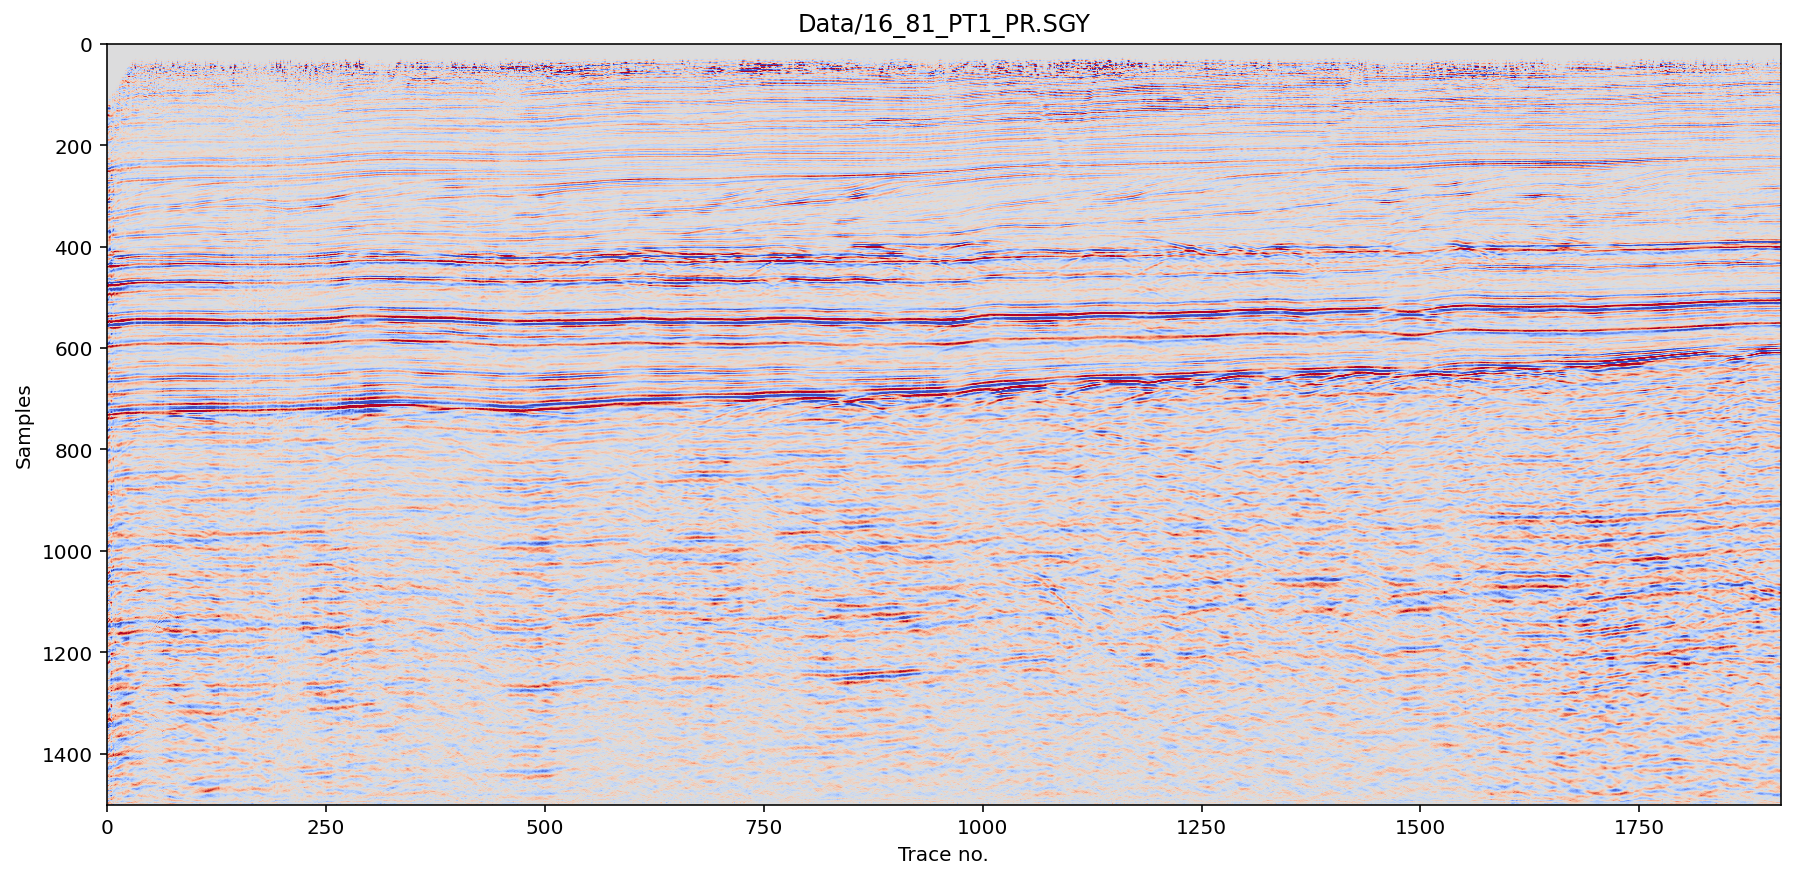

In [19]:
# Let's display the seismic lines
clip = abs(np.percentile(data, 0.999))   # default clip value

plt.figure(figsize=(15,7))
plt.imshow(data,interpolation='bilinear',aspect='auto',vmin=-clip,vmax=clip,cmap='coolwarm')
plt.title('{0}'.format(filename))
plt.ylabel('Samples')
plt.xlabel('Trace no.')

Once again, we are just looking at data loading, in later case-studies we will have more advanced applications.

## 2.7 HyperText Markup Language (.html)
The **HyperText Markup Language** or (**HTML**) is the standard markup language for documents designed to be displayed in a web browser. It can be assisted by technologies such as Cascading Style Sheets and scripting languages such as JavaScript. You can think of it as the backbone of any web display as it dictates the structer and content of the document.

It's not generally encountred in the O&G industry aside from **Well Reports**, since it's fairly easy to interpretate by eye. But that said, keep in mind that any web page is written in the following structure, and at times you'd probably like to scrape (get all the data) related of something of intrest with out manually copy-pasting the data an observation at a time.

You can lookup the provided example of the "**DDR.html**" file by opening it in the browser, and we'll see how to load it into our notebook using the [pandas](https://pandas.pydata.org) lib.

In [20]:
# Loading the html file using pandas
df_html = pd.read_html('Data/DDR.html')

# Checking the length of the file
len(df_html)

10

The result indicates 10 instances within the file, just a list we can index it to look up each one individually.

In [21]:
# Let's check the first instance of the DDR file by indexing it
# Let's display the operations table (Number 4) -> 3rd index
df_html[3]

,Start time,End time,End Depth mMD,Main - Sub Activity,State,Remark
0,00:00,00:15,99,drilling -- trip,ok,Installed autoslips.
1,00:15,00:45,303,drilling -- trip,ok,"Continued RIH with 8½ BHA on 5"" DP from 99m to..."
2,00:45,02:00,303,drilling -- trip,ok,"Filled string, empty trip tank. Made up x-over..."
3,02:00,04:30,1320,drilling -- trip,ok,"Continued RIH with 8½ BHA on 5"" DP from 303 to..."
4,04:30,05:00,1320,drilling -- trip,ok,"Installed 5"" x 5½"" XO. Changed handling equipm..."
5,05:00,06:00,1844,drilling -- trip,ok,"Continued RIH with 8½ BHA on 5½"" DP from 1320 ..."
6,06:00,08:30,2651,drilling -- trip,ok,"RIH with 8½ BHA on 5½"" DP from 1844 to 2651m. ..."
7,08:30,09:15,2651,interruption -- maintain,ok,"Serviced FWD PRS, due to unexplained noise."
8,09:15,10:00,2920,drilling -- trip,ok,"RIH with 8½ BHA on 5½"" DP from 2651 to 2920m. ..."
9,10:00,10:30,3259,drilling -- trip,ok,Broke circulation at shoe and washed down from...


Note that the **panda** lib explicitly deals with tables, which is what we want in this case. But sometimes the data we are interested in is not present in an table format, for these applications we would use the **bs4** lib, we will discuss this in a upcoming case study the application of the later in which we'll be forecasting the value of an O&G company's stock.

## 2.8 Digital Log Interchange Standard  (.dlis)
**Digital Log Interchange Standard** (**DLIS**) files are structured binary files that contain data tables for well information and logging data. This file format was developed in the late 1980s by Schlumberger and published in 1991 by the American Petroleum Institute to create a standardized format for logging data.

The DLIS file format can be difficult to use because it was developed nearly 30 years ago, and different software and vendors can create their own version of DLIS by adding new structures and object types.

DLIS files contain large amounts of metadata associated with the well and data. These sections do not contain the well data, they are stored in frames, which can be numerous and represent different logging runs/executions or processing steps (e.g. raw or interpreted). The frames are table objects that contain the well logging data, where each column represents a logging curve, and this data is indexed by time or depth. Each logging curve in the frame is called a channel. Channels can be one-dimensional or multi-dimensional.

We're gonna use the [dlisio](https://github.com/equinor/dlisio) Lib, to load and wrangle this specific format.

A physical DLIS file can contain multiple logical files, therefore, using this syntax allows the first file to be output to `f` and any subsequent logical files placed into `tail`.

By using `describe` method we can obtain a content summary of the file, uncluding `origins, channels, tools, etc... `

In [22]:
f, *tail = dlis.load('Data/NLOG_LIS_LAS_7857_FMS_DSI_MAIN_LOG.DLIS')
f.describe()

------------
Logical File
------------
Description : LogicalFile(FMS_DSI_138PUP)
Frames      : 4
Channels    : 484

Known objects
--
CHANNEL                 : 484
PARAMETER               : 480
AXIS                    : 50
CALIBRATION-COEFFICIENT : 12
FRAME                   : 4
ORIGIN                  : 1
PROCESS                 : 3
CALIBRATION             : 341
EQUIPMENT               : 27
FILE-HEADER             : 1
CALIBRATION-MEASUREMENT : 22
TOOL                    : 5

Unknown objects
--
440-CHANNEL                  : 538
440-OP-CHANNEL               : 573
440-PRESENTATION-DESCRIPTION : 1


You can check any of these content simply by running `f.object_of_intrest`, Store it in a or multiple variable(s) then describe it.

The first set of metadata we will look at is the **origin**. This provides information about the source of the data within the file. Occassionally, data may originate from multiple sources so we need to account for this by unpacking the origins into two variables.

In [23]:
origin, *origin_tail = f.origins
origin.describe()

------
Origin
------
name   : DLIS_DEFINING_ORIGIN
origin : 41
copy   : 0

Logical file ID          : FMS_DSI_138PUP
File set name and number : WINTERSHALL/L5-9 / 41
File number and type     : 170 / PLAYBACK

Field                   : L5
Well (id/name)          :  / L5-9
Produced by (code/name) : 440 / Schlumberger
Produced for            : Wintershall Noordzee B.V.
Run number              : -1
Descent number          : -1
Created                 : 2002-02-17 18:18:52

Created by              : OP, (version: 9C2-303)
Other programs/services : MESTB: Micro Electrical Scanner - B (Slim)  SGTL:
                          Scintillation Gamma-Ray - L           DTAA: Downhole
                          Toolbus Adapter - A          DSSTB: Dipole Shear
                          Imager - B              DTCA: DTS Telemetry Cartridge
                          ACTS: Auxiliary Compression Tension Sub - B DIP: Dip
                          Computation                        DIR: Directional
          

**Frames** within a DLIS file can represent different logging passes or different stages of data, such as raw well log measurements to pertophysical interpretations or processed data. Each frame has a number of properties.

In [24]:
# We can check the present frames in the file 
f.frames

[Frame(60B), Frame(10B), Frame(1B), Frame(15B)]

In [25]:
# and the channels within each frame
#f.channels

In [26]:
# and the paramters can be accessed by
#f.parameters

In [27]:
# tools used
#f.tools

In [28]:
# The example code below prints out the properties in an easy-to-read format.
for frame in f.frames:
    
    # Search through the channels for the index and obtain the units
    for channel in frame.channels:
        if channel.name == frame.index:
            depth_units = channel.units
    
    print(f'Frame Name: \t\t {frame.name}')
    print(f'Index Type: \t\t {frame.index_type}')
    print(f'Depth Interval: \t {frame.index_min} - {frame.index_max} {depth_units}')
    print(f'Depth Spacing: \t\t {frame.spacing} {depth_units}')
    print(f'Direction: \t\t {frame.direction}')
    print(f'Num of Channels: \t {len(frame.channels)}')
    print(f'Channel Names: \t\t {str(frame.channels)}')
    print('\n\n')

Frame Name: 		 60B
Index Type: 		 BOREHOLE-DEPTH
Depth Interval: 	 0 - 0 0.1 in
Depth Spacing: 		 -60 0.1 in
Direction: 		 DECREASING
Num of Channels: 	 77
Channel Names: 		 [Channel(TDEP), Channel(BS), Channel(CS), Channel(TENS), Channel(ETIM), Channel(DEVI), Channel(P1AZ_MEST), Channel(ANOR), Channel(FINC), Channel(HAZI), Channel(P1AZ), Channel(RB), Channel(SDEV), Channel(GAT), Channel(GMT), Channel(ECGR), Channel(ITT), Channel(SPHI), Channel(DCI2), Channel(DCI4), Channel(SOBS), Channel(DTCO), Channel(DTSM), Channel(PR), Channel(VPVS), Channel(CHR2), Channel(DT2R), Channel(DTRP), Channel(CHRP), Channel(DTRS), Channel(CHRS), Channel(DTTP), Channel(CHTP), Channel(DTTS), Channel(CHTS), Channel(DT2), Channel(DT4P), Channel(DT4S), Channel(SPCF), Channel(DPTR), Channel(DPAZ), Channel(QUAF), Channel(DDIP), Channel(DDA), Channel(FCD), Channel(HDAR), Channel(RGR), Channel(TIME), Channel(CVEL), Channel(MSW1), Channel(MSW2), Channel(FNOR), Channel(SAS2), Channel(SAS4), Channel(PWF2), Channel(PW

It's relatively simple to extract the parameter of intrest, you need to first identify the frame in which your paramter is stored then store the data in a array and finally put it togheter in a DataFrame.

In [29]:
# Let's check frame '10B'
frame2 =f.object('FRAME','10B')

# Extract all the curves
frame2_curves =frame2.curves()

# Define each curve individually
TDEP=frame2_curves['TDEP']
TIME=frame2_curves['TIME']
IDWD=frame2_curves['IDWD']
SCD=frame2_curves['SCD']

frame_2_list= [TDEP,TIME,IDWD,SCD]
frame_2_columns= ['TDEP','TIME','IDWD','SCD']

# Build the data frame
frame2_df= pd.DataFrame(frame_2_list).T
frame2_df.columns=frame_2_columns
frame2_df

,TDEP,TIME,IDWD,SCD
0,1897260.0,0.0,1897231.875,1897258.250
1,1897250.0,0.0,1897231.875,1897258.250
2,1897240.0,0.0,1897231.875,1897258.250
3,1897230.0,0.0,1897221.875,1897247.875
4,1897220.0,0.0,1897211.875,1897238.000
...,...,...,...,...
9625,1801010.0,301.0,1801002.000,1801015.625
9626,1801000.0,301.0,1800992.000,1801005.625
9627,1800990.0,301.0,1800982.000,1800995.250
9628,1800980.0,301.0,1800972.000,1800985.125


I realize that the latter is relatively more complicated than the others, but don't worry, you'll get a good feel for it when we start exploring its usefulness.

These are the most commonly encountered data formats in the O&G industry. In some special cases, we will have to deal with images, such as when building an image classifier, but we will come back to that at the appropriate time.

Keep in mind that regardless of the format, there must be an enthusiast somewhere who has already addressed it, and generally all you have to do is search the web *how to load a .format into python*, as is the case with any potential problem you will face.
___

# 3. Preprocessing the data
The data now loaded and put into a `DataFrame`, let's start looking the most commonly needed methods to deal with data:

Of course, there are a plethora of ways to deal with these problems, and there are certainly many more cases than those listed here, but aside from a few special cases, you'll probably find yourself using these. And just a quick reminder, a quick search on [Stackoverflow](https://stackoverflow.com/) will most likely contain your exact problem.

## 3.1 Data navigation and wrangling

In [30]:
# Let's take the first volve production data as an example and create a copy
df= df_csv.copy()

# show first rows
df.head()

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,15/9-F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,15/9-F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,15/9-F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN


In [31]:
# show dimensions
print("Dimensions: {}".format(df.shape))

Dimensions: (526, 10)


In [32]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  526 non-null    object 
 1   NPDCode        526 non-null    int64  
 2   Year           526 non-null    int64  
 3   Month          526 non-null    int64  
 4   On Stream      515 non-null    float64
 5   Oil            311 non-null    float64
 6   Gas            311 non-null    float64
 7   Water          311 non-null    float64
 8   GI             0 non-null      float64
 9   WI             201 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 41.2+ KB


In [33]:
# show statistics
df.describe()

,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
count,526.000000,526.000000,526.000000,515.000000,311.000000,3.110000e+02,311.000000,0.0,201.000000
mean,5906.731939,2012.380228,6.482890,595.908738,32273.594855,4.743956e+06,49255.868167,NaN,150896.184080
std,650.021100,2.633829,3.417977,196.675634,37361.959851,5.302562e+06,47458.138562,NaN,56431.395804
min,5351.000000,2007.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,0.000000
25%,5599.000000,2010.000000,4.000000,561.500000,6085.500000,9.236520e+05,3534.500000,NaN,126377.000000
50%,5693.000000,2013.000000,6.500000,684.000000,17871.000000,2.722573e+06,36196.000000,NaN,150431.000000
75%,5769.000000,2015.000000,9.000000,720.000000,37607.500000,5.780980e+06,94056.000000,NaN,188426.000000
max,7405.000000,2016.000000,12.000000,745.000000,166440.000000,2.410636e+07,155366.000000,NaN,270199.000000


**Quick Tip :** 
- If you're using jupyter notebook, you can put your cursor inside a function `df.describe(l)` and click the `Tab` key. This will open a small menu which shows all about that function.
- You can get the same results by puting the function inside the python `help()` function.

In [34]:
# help(df.describe())

### 3.1.1 Selecting specific instances based on index(es)

To select individual rows and slices of rows, pandas provides two methods:
* `loc` is useful when the index of the DataFrame is a label (a string).
* `iloc` works by looking for the position in the DataFrame.

In [35]:
# select the first row
print(df.iloc[0])
print('\n\n')

# select five rows form x:y
print(df.iloc[10:15])
print('\n\n')

# select the list row
print(df.iloc[-1])

Wellbore name     15/9-F-1 C
NPDCode                 7405
Year                    2014
Month                      4
On Stream                228
Oil                    11142
Gas              1.59794e+06
Water                      0
GI                       NaN
WI                       NaN
Name: 0, dtype: object



   Wellbore name  NPDCode  Year  Month  On Stream     Oil        Gas    Water  \
10    15/9-F-1 C     7405  2015      2      437.0  9587.0  1439454.0  10745.0   
11    15/9-F-1 C     7405  2015      3      320.0  5879.0   856681.0  11607.0   
12    15/9-F-1 C     7405  2015      4      263.0  3924.0   566710.0   9815.0   
13    15/9-F-1 C     7405  2015      5      181.0  3833.0   559060.0   6167.0   
14    15/9-F-1 C     7405  2015      6      466.0  6345.0   925337.0  14549.0   

    GI  WI  
10 NaN NaN  
11 NaN NaN  
12 NaN NaN  
13 NaN NaN  
14 NaN NaN  



Wellbore name    15/9-F-5
NPDCode              5769
Year                 2016
Month                   9
On Stream   

### 3.1.2 Modifying index

You can set the index in a `DataFrame` as you like (time, numerical or even categorical).

In [36]:
# Now let's set the index to the well names
df = df.set_index(df['Wellbore name']).drop('Wellbore name', axis=1)
df

,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
Wellbore name,,,,,,,,,
15/9-F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
15/9-F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
15/9-F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
15/9-F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
15/9-F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15/9-F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
15/9-F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
15/9-F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0


In [37]:
# Lets select the F-4 wells only, here loc function comes handy
df.loc['15/9-F-4']

,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
Wellbore name,,,,,,,,,
15/9-F-4,5693,2007,9,NaN,NaN,NaN,NaN,NaN,NaN
15/9-F-4,5693,2007,10,NaN,NaN,NaN,NaN,NaN,NaN
15/9-F-4,5693,2007,11,NaN,NaN,NaN,NaN,NaN,NaN
15/9-F-4,5693,2007,12,NaN,NaN,NaN,NaN,NaN,NaN
15/9-F-4,5693,2008,1,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15/9-F-4,5693,2016,8,657.0,NaN,NaN,NaN,NaN,132383.0
15/9-F-4,5693,2016,9,340.0,NaN,NaN,NaN,NaN,61201.0
15/9-F-4,5693,2016,10,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1.3 Selecting specific instances based on condition(s)

Now let's see how we can select data based on a single or multiple **conditions**.

In [38]:
# Reseting the data
df= df_csv.copy()

# Selecting data based on one condition
# Let's select the data from the year 2016 only
df_2016= df[df['Year'] == 2016]

# Now we got the data from 2016 only
df_2016

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
21,15/9-F-1 C,7405,2016,1,388.0,2981.0,471676.0,14036.0,NaN,NaN
22,15/9-F-1 C,7405,2016,2,484.0,4718.0,742340.0,15946.0,NaN,NaN
23,15/9-F-1 C,7405,2016,3,357.0,2918.0,476830.0,13411.0,NaN,NaN
24,15/9-F-1 C,7405,2016,4,141.0,1672.0,274213.0,4441.0,NaN,NaN
55,15/9-F-11,7078,2016,1,736.0,31603.0,4949941.0,67981.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,15/9-F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,15/9-F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,15/9-F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


In [39]:
# You can add as much conditions as you want
# Simply place the condition plus the logical operator' ..... 
# Let's select the data from the year 2016 And in first month only
df_2016_1= df[(df['Year'] == 2016) & (df['Month'] == 1)]

# Now we got the data from 2016 only
df_2016_1

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
21,15/9-F-1 C,7405,2016,1,388.0,2981.0,471676.0,14036.0,NaN,NaN
55,15/9-F-11,7078,2016,1,736.0,31603.0,4949941.0,67981.0,NaN,NaN
159,15/9-F-12,5599,2016,1,736.0,9495.0,1487340.0,38970.0,NaN,NaN
263,15/9-F-14,5351,2016,1,736.0,4606.0,721124.0,97148.0,NaN,NaN
296,15/9-F-15 D,7289,2016,1,350.0,2891.0,445568.0,3649.0,NaN,NaN
405,15/9-F-4,5693,2016,1,721.0,NaN,NaN,NaN,NaN,152130.0
517,15/9-F-5,5769,2016,1,721.0,NaN,NaN,NaN,NaN,148395.0


You can see that in January, 2016 some wells had no production.

### 3.1.4 Replacing values

Now let's see how to replace values in a `DataFrame`, this can be done in multiple ways, here let's use pandas `replace` method.

And it can replace a single value or multiple at a time, independantly of the data type. We'll apply this on the `Wellbore name`, the `15/9-` is common between the wells, so let's just shorten it the the last letters.

In [40]:
# Let's check the Well names before
df['Wellbore name'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [41]:
# replace any instance of 'female' with Woman
short_names_df= df.replace(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D','15/9-F-4', '15/9-F-5'], 
                  ['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D','F-4', 'F-5'])
short_names_df

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


In [42]:
# Let's check the Well names after we replaced the values
short_names_df['Wellbore name'].unique()

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype=object)

### 3.1.5 Renaming columns

Now let's replace some column names, using pandas `rename` method. just like replace for values it can be used for multiple instances or for a single one.

The column `Wellbore name` seems too long for me let's rename it into `Well` only.

In [43]:
short_names_df.rename(columns={'Wellbore name': 'Well'}, inplace=True)

In [44]:
short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


### 3.1.6 Finding statistical measures

Now let's find some statistical measures, pandas `describe` method to get a direct summary, or we can get them individyally, let's also take this as a opportunity to use functions for ease of re-usage.

Let's define a function to get the following attributes (max, min, mean, sum, count, var, std, kurt, skew).

In [45]:
def stats(df, column):
    df[column].dropna()
    print('Maximum: {}'.format(df[str(column)].max()))
    print('Minimum: {}'.format(df[str(column)].min()))
    print('Mean: {}'.format(df[str(column)].mean()))
    print('Sum: {}'.format(df[str(column)].sum()))
    print('Count: {}'.format(df[str(column)].count()))
    print("Variance: {}".format(df[str(column)].var()))
    print("Standard Deviation: {}".format(df[str(column)].std()))
    print("Kurtosis: {}".format(df[str(column)].kurt()))
    print("Skewness: {}".format(df[str(column)].skew()))

In [46]:
# Let's check the stats for inject gas
stats(short_names_df, 'Oil')

Maximum: 166440.0
Minimum: 0.0
Mean: 32273.594855305466
Sum: 10037088.0
Count: 311
Variance: 1395916043.893393
Standard Deviation: 37361.95985080805
Kurtosis: 1.993632415804652
Skewness: 1.6460017512657754


**Don't** worry if you don't understand these yet, because we'll get to them and theirs significance in a later `Statistical Notebook`.

### 3.1.7 Finding unique values and counting them

Although we have already used it by now, let's see how we can find unique values and count them using repectively pandas `unique` and `value_counts` methods.

You'l use them especially during quality check and values distribution assessment. 

In [47]:
# Check all the unique well names in the data
short_names_df['Well'].unique()

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype=object)

In [48]:
# Let's count the number of accuraces
short_names_df['Well'].value_counts()

F-4       112
F-5       109
F-14      104
F-12      104
F-11       39
F-15 D     33
F-1 C      25
Name: Well, dtype: int64

In [49]:
# Let's show the frequencies and sort them
short_names_df['Well'].value_counts(normalize=True, ascending=True)

F-1 C     0.047529
F-15 D    0.062738
F-11      0.074144
F-12      0.197719
F-14      0.197719
F-5       0.207224
F-4       0.212928
Name: Well, dtype: float64

From this we can see that `F-4` represents the greater portions of this data with a 21%. You see if you use this data for machine learning there will be some bias which has to be accounted for.

### 3.1.8 Checking for missing values

Okey, by now you've probably noticed `NaN` values, that stands for `Not a Number`, in other words missing data. Let's count them and see how much we're actually missing in each column.

Let's take the opportunity and check for missin values in each column using a `for` loop.

In [50]:
short_names_df.shape

(526, 10)

In [51]:
for column in short_names_df.columns:
    print('Number of missing values in the {} column is: {}'.format(column, short_names_df[column].isna().sum()))
    #short_names_df[column].isna().sum()

Number of missing values in the Well column is: 0
Number of missing values in the NPDCode column is: 0
Number of missing values in the Year column is: 0
Number of missing values in the Month column is: 0
Number of missing values in the On Stream column is: 11
Number of missing values in the Oil column is: 215
Number of missing values in the Gas column is: 215
Number of missing values in the Water column is: 215
Number of missing values in the GI column is: 526
Number of missing values in the WI column is: 325


Oh wow! we're really missing a serious pourcentage in some features. We'll see how to deal with them in the `Numerical Data Handling` sub section.

But the `GI` column seems empty, so we'll drop it completly.

### 3.1.9 Deleting columns and rows

In [52]:
# Drop 'GI' column
short_names_df.drop('GI', axis=1)

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,WI
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN
...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,0.0
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,0.0
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,0.0


**Tips:** 
- Before you lock your modifications, apply your method without specifying a variable to store it in, and without setting the `inplace=True` parameter. This we'll allow you to check the results first.
- Just like in our case, the original data hasn't been modified since we created a copy of it, do this as well in your application, in case of a mistake you can always go back.
- And don't worry you can easily save your data post modification easily.

What about deleting a single row or multiple ones. Well it can be done using a the index, or by specifying a condition.

In [53]:
# Deleting index 0
short_names_df[short_names_df.index != 0]

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
5,F-1 C,7405,2014,9,630.0,9168.0,1414100.0,8318.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


In [54]:
# deleting rows with well F-1 C
short_names_df[short_names_df['Well'] != 'F-1 C']

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
25,F-11,7078,2013,7,113.0,3923.0,590505.0,0.0,NaN,NaN
26,F-11,7078,2013,8,587.0,25496.0,3871942.0,520.0,NaN,NaN
27,F-11,7078,2013,9,539.0,23775.0,3661574.0,1574.0,NaN,NaN
28,F-11,7078,2013,10,678.0,34115.0,5272724.0,1927.0,NaN,NaN
29,F-11,7078,2013,11,712.0,35386.0,5413486.0,3791.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


**Note:** When you delete a row, the index becomes non-uniform, so you might need to reset the index from `0` using pandas `reset_index` method.

### 3.1.10 Removing data duplicates

Some times your dataset might contain exact duplicates, so it might be necessary to drop them off using pandas `drop_duplicates` method:
- `subset`: alows to specify the reference of the duplication
- `keep`: can be set `last` or `first` to see which instance to let

In [55]:
# Drop duplicates
short_names_df.drop_duplicates(subset=['NPDCode'], keep='first')

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
25,F-11,7078,2013,7,113.0,3923.0,590505.0,0.0,NaN,NaN
64,F-12,5599,2008,2,407.0,49091.0,7068009.0,413.0,NaN,NaN
168,F-14,5351,2008,2,0.0,0.0,0.0,0.0,NaN,NaN
272,F-15 D,7289,2014,1,340.0,5675.0,820969.0,0.0,NaN,NaN
305,F-4,5693,2007,9,NaN,NaN,NaN,NaN,NaN,NaN
417,F-5,5769,2007,9,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1.11 Grouping a DataFrame by a value or a list of them

Another functionality that is very powerfull is pandas `groupby` method, similar to the pivot function MS-Excel, it permits to gain in depth insights.

For example let's check the mean oil production, cummulative production by well, total oil production per well for each year

In [56]:
# For example let's check the mean oil production by well
short_names_df.groupby('Well')['Oil'].mean()

Well
F-1 C      7108.360000
F-11      29432.128205
F-12      44034.740385
F-14      37906.096154
F-15 D     4500.575758
F-4                NaN
F-5        6860.000000
Name: Oil, dtype: float64

In [57]:
# For example let's check the total oil production by well
short_names_df.groupby('Well')['Oil'].sum()

Well
F-1 C      177709.0
F-11      1147853.0
F-12      4579613.0
F-14      3942234.0
F-15 D     148519.0
F-4             0.0
F-5         41160.0
Name: Oil, dtype: float64

In [58]:
# total oil production per well for each year
short_names_df.groupby(['Well', 'Year'])['Oil'].sum()

Well    Year
F-1 C   2014     103184.0
        2015      62236.0
        2016      12289.0
F-11    2013     156101.0
        2014     362225.0
        2015     465818.0
        2016     163709.0
F-12    2008    1173447.0
        2009    1522542.0
        2010     873829.0
        2011     339718.0
        2012     225822.0
        2013     138155.0
        2014      57999.0
        2015     200201.0
        2016      47900.0
F-14    2008     590928.0
        2009    1161852.0
        2010     816073.0
        2011     508246.0
        2012     348386.0
        2013     263760.0
        2014     151564.0
        2015      78396.0
        2016      23029.0
F-15 D  2014      68136.0
        2015      55099.0
        2016      25284.0
F-4     2007          0.0
        2008          0.0
        2009          0.0
        2010          0.0
        2011          0.0
        2012          0.0
        2013          0.0
        2014          0.0
        2015          0.0
        2016          0.0

Very insighful isn't it, combining these with some data visualization provides access to a decent amount of information, we'll explore this in the `Visualization Notebook`.

A major amount of time you'd propably like to create new columns from existing ones or applying modification on exsistant ones. It can be done using for loops or a more pythonista manner being list comprehension, or also using the pandas `apply` method.

For example lets convert the `Oil` column from barrels to cubic meters.

In [59]:
# Creating a new column
short_names_df['Oil m3']=short_names_df['Oil']*0.1589873
short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602


### 3.1.12 Applying a function over a column of data

In [60]:
# for .. in .. loop
for value in short_names_df['Oil m3'][0:10]:
    print(value*1000)

1771436.4966
3959101.7446
3119012.8514
2398482.4078
1108141.481
1457595.5664000001
1505291.7563999998
1066804.783
19078.476
1729145.8748


In [61]:
# list comprehension
[value*1000 for value in short_names_df['Oil m3'][0:10]]

[1771436.4966,
 3959101.7446,
 3119012.8514,
 2398482.4078,
 1108141.481,
 1457595.5664000001,
 1505291.7563999998,
 1066804.783,
 19078.476,
 1729145.8748]

In [62]:
# Apply method
def thousand_factor(x):
    return x*1000

short_names_df['Oil m3'].apply(thousand_factor)[0:10]

0    1.771436e+06
1    3.959102e+06
2    3.119013e+06
3    2.398482e+06
4    1.108141e+06
5    1.457596e+06
6    1.505292e+06
7    1.066805e+06
8    1.907848e+04
9    1.729146e+06
Name: Oil m3, dtype: float64

### 3.1.13 Data concatenation

Sometimes you'll need to *Glue* to DataFrames together, in the world of data science that is called *Concatenating*, Say you have multiple sources and you want put them together, for that we'll use pandas `concat` method.

In [63]:
short_names_df.Well.unique()

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype=object)

In [64]:
# Let's seperate the well the put them back together
well_1= short_names_df.loc[short_names_df.Well== 'F-1 C']
well_2= short_names_df.loc[short_names_df.Well== 'F-11']

In [65]:
# Let's see well_1 and well_2
well_1[0:4]

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408


In [66]:
well_2[0:4]

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
25,F-11,7078,2013,7,113.0,3923.0,590505.0,0.0,NaN,NaN,623.707178
26,F-11,7078,2013,8,587.0,25496.0,3871942.0,520.0,NaN,NaN,4053.540201
27,F-11,7078,2013,9,539.0,23775.0,3661574.0,1574.0,NaN,NaN,3779.923058
28,F-11,7078,2013,10,678.0,34115.0,5272724.0,1927.0,NaN,NaN,5423.851739


As you can see, each data frame contains a specific well. And since they have the same columns we can put them together easily using `concat`.

In [67]:
# Concatenate DataFrames by rows
well_1_2= pd.concat([well_1, well_2], axis=0)
well_1_2

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
59,F-11,7078,2016,5,744.0,15529.0,2450714.0,73445.0,NaN,NaN,2468.913782
60,F-11,7078,2016,6,718.0,14591.0,2349131.0,71699.0,NaN,NaN,2319.783694
61,F-11,7078,2016,7,740.0,14385.0,2309447.0,77085.0,NaN,NaN,2287.032310
62,F-11,7078,2016,8,744.0,14584.0,2341372.0,87762.0,NaN,NaN,2318.670783


In [68]:
well_1.columns

Index(['Well', 'NPDCode', 'Year', 'Month', 'On Stream', 'Oil', 'Gas', 'Water',
       'GI', 'WI', 'Oil m3'],
      dtype='object')

We can also concatenate the data by columns rather than rows, like the following.

In [69]:
# Concatenate DataFrames by colmuns
production_data_well_1= well_1[['Year', 'Month', 'On Stream', 'Oil', 'Gas', 'Water']]
injection_data_well_1= well_1[['GI', 'WI']]

In [70]:
production_data_well_1[0:4]

,Year,Month,On Stream,Oil,Gas,Water
0,2014,4,228.0,11142.0,1597937.0,0.0
1,2014,5,734.0,24902.0,3496230.0,783.0
2,2014,6,706.0,19618.0,2886662.0,2068.0
3,2014,7,742.0,15086.0,2249366.0,6244.0


In [71]:
injection_data_well_1[0:4]

,GI,WI
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN


In [72]:
well_1_prod_inj=pd.concat([production_data_well_1, injection_data_well_1], axis=0)
well_1_prod_inj[0:5]

,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,2014.0,4.0,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,2014.0,5.0,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,2014.0,6.0,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,2014.0,7.0,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,2014.0,8.0,433.0,6970.0,1048191.0,4530.0,NaN,NaN


### 3.1.14 Data merging

Alright now jump tp `merging` data sets.
Oftentimes, the data we need to use is complex; it doesn’t always come in one piece. So you'll probably need to *join* different data sources in a single data set, according to a specific value which is called `key`.

There is multiple merging methods, each adequate to a specific situation. we'll briefly touch on the most common ones, being:
- `Inner` Return only the rows that match in both DataFrames
- `Outer` Return all rows in both DataFrames. If a row exists in one DataFrame but not in the other DataFrame, fill NaN values for the missing values
- `Left` Return all rows from the left DataFrame but only rows from the right DataFrame that matched with the left DataFrame. Fill NaN values for the missing values
- `Right` Return all rows from the right DataFrame but only rows from the left DataFrame that matched with the right DataFrame. Fill NaN values for the missing values

The below figure shows a representation of the mentioned joints.

<img src="https://th.bing.com/th/id/OIP.X_X1xHbuHyTpjjBeKhs9EAHaFX?pid=ImgDet&rs=1" alt="Joint-representation" />

Let's create some generic data to set the example.

In [73]:
# Create DataFrame
well_data = {'Well_id': ['1', '2', '3', '4'],
             'Region': ['R1', 'R2', 'R3','R4']}

dataframe_wells = pd.DataFrame(well_data, 
                                   columns = ['Well_id','Region'])

# Create DataFrame
production_data = {'Well_id': ['3', '4', '5', '6'],
                   'Production': [1000, 2000, 3000, 4000]}

dataframe_production = pd.DataFrame(production_data, 
                                    columns = ['Well_id','Production'])


In [74]:
# Let's look up the first DataFrame
dataframe_wells

,Well_id,Region
0,1,R1
1,2,R2
2,3,R3
3,4,R4


In [75]:
# Let's look up the second DataFrame
dataframe_production

,Well_id,Production
0,3,1000
1,4,2000
2,5,3000
3,6,4000


In [76]:
# Merge DataFrames on well_id (Inner join)
pd.merge(dataframe_wells, dataframe_production, on='Well_id')

,Well_id,Region,Production
0,3,R3,1000
1,4,R4,2000


In [77]:
# Merge DataFrames on well_id (Outer join)
pd.merge(dataframe_wells, dataframe_production, on='Well_id', how='outer')

,Well_id,Region,Production
0,1,R1,NaN
1,2,R2,NaN
2,3,R3,1000.0
3,4,R4,2000.0
4,5,NaN,3000.0
5,6,NaN,4000.0


In [78]:
# Merge DataFrames on well_id (left join)
pd.merge(dataframe_wells, dataframe_production, on='Well_id', how='left')

,Well_id,Region,Production
0,1,R1,NaN
1,2,R2,NaN
2,3,R3,1000.0
3,4,R4,2000.0


In [79]:
# Merge DataFrames by selecting the common 'key'
pd.merge(dataframe_wells, dataframe_production, 
         left_on='Well_id', 
         right_on='Well_id')

,Well_id,Region,Production
0,3,R3,1000
1,4,R4,2000


## 3.2 Numerical data handling

### 3.2.1 Handling missing data

There are multiple ways we can deal with missing. And that depends exactly on the case given. We can either:
- Drop the column completly.
- Drop some instances of the column.
- Fill the data forward, backward.
- Fill missing data with a specific value, or a statistical measure such as the mean.
- Fill missing data by interpolation, using a linear or polynomial equation.
- Fill using more advanced machine learning algorithms.

I'm probably missing some approachs here, but these are the most widly used.

The reason this is so important is that it dictates the accuracy and credibility of anything you build on top of them, it is quite easy to use most data with the wrong approach, or to introduce a bias. This greatly affects the quality of your analysis as well as the predictive power of your models.

Here, domain expertise plays a major role, you need to get back to the fundamental fact that each of these data points, probably cost you or your client a decent amount of time and money. It is therefore in your best interest to save as much as possible while maintaining overall quality.

I'll show you how to perform each, and you're free to use which ever suits you best in your case.

**My personal approach to this case**: 
In this specific case I would have seperated each well, then ploted the measures in a graphic to see how it variates, from there I would probably set the missing the missing to a value of `0`, with the assumption that production has been stoped due to remedial jobs, or to build up pressure.

Using pandas `drop` method we can either drop rows or columns.

In [80]:
# Dropping the column completly
# the 'GI' column is basicly empty, it maybe because they didn't use gas to enhance recovery
# So we'll drop 'GI' completly
short_names_df.drop('GI', axis=1)

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,0.0,1419.597602


We can also drop the `NaN` values accross the entire DataFrame, using pandas `dropna` method. Multiple options are available on how to drop, as an example:
- Passing `how="all"` will drop only rows that are all NA
- Passing `how="any"` will drop all rows if any column is NA
- To drop columns in the same way, pass `axis="columns"`
- You can indicate this with the `thresh` argument, the minimal amount

In [81]:
short_names_df.dropna(axis=0, how="all")

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602


In [82]:
short_names_df.dropna(axis="columns", how="any")

,Well,NPDCode,Year,Month
0,F-1 C,7405,2014,4
1,F-1 C,7405,2014,5
2,F-1 C,7405,2014,6
3,F-1 C,7405,2014,7
4,F-1 C,7405,2014,8
...,...,...,...,...
521,F-5,5769,2016,5
522,F-5,5769,2016,6
523,F-5,5769,2016,7
524,F-5,5769,2016,8


In [83]:
short_names_df.dropna(axis=0,thresh=500)

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3


In [84]:
# Now let's fill the missing data with the value 0
short_names_df.fillna(0)

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,0.0,0.0,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,0.0,0.0,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,0.0,0.0,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,0.0,0.0,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,0.0,0.0,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,0.0,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,0.0,0.0,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,0.0,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,0.0,0.0,1419.597602


In [85]:
# We can also specify the column to fill
short_names_df[['WI']].fillna(0)

,WI
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
521,0.0
522,0.0
523,0.0
524,0.0


forward and backward fill don't make much sense since all the wells are in a single DataFrame, but let's see how to do it.

In [86]:
# forward fill 
short_names_df.fillna(method="ffill")

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,0.0,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602


In [87]:
# Backward fill
short_names_df.fillna(method="ffill")

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,0.0,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602


It's also very common in the O&G sector to find `NaN` values to that are indicated with a `-999` value or something similar. So this is how you'd deal with them.

In [88]:
# You can either define the NaN values when you load the data
#dataframe = pd.read_csv(data_file, na_values=[np.nan, 'NONE', -999])

# Or replace values directly with NaN
#short_names_df['WI'].replace(-999, np.nan)

For the interpolation and the ML-based methods we'll deal with them in the case studies. Not to mingle concepts up.

### 3.2.2 Rescaling, Standardizing, Normalizing observations

**Normalization** and **Standardization** all refer to a very common transformation in the workflow of an ML project, the main idea being to set the parameters within a certain range, and the reason this is done is because some algorithms assume this in their criteria, especially the so-called *distance-based algorithms*, where the magnitude of different variables can vary greatly and this exact difference in magnitude, could have an impact on the interpretation of the variable by the algorithm. By giving it extra `weight` or importance, while making the others redundant.

This can be performed in multiple ways, each presenting a specific creteria.
- **Feature normalization**: Feature normalization guarantees that each feature will be scaled to [0,1] interval. This is a critical step simply due to the fact that a model will be biased when features have different magnitudes. 

- **Feature standardization (z-Score normalization)**: Standardization transforms each feature with Gaussian distribution to Gaussian distribution with a mean of 0 and a standard deviation of 1. Note that standardization does not transform the underlying distribution structure of the data.  (Once again don't bother with it for now, we'll clarify these in the `Statistics Notebook`).


Let's simply rescale the variables using [sklearn](https://scikit-learn.org/stable/index.html) `MinMaxScaler` to set a value in a well defined range.

In [89]:
# Create scaler
minmax_scale = MinMaxScaler(feature_range=(0, 1))

# Scale feature taking continuos variables only
scaled_df = minmax_scale.fit_transform(short_names_df[['On Stream', 'Oil', 'Gas', 'Water']])

# let's view the scaled data
pd.DataFrame(scaled_df, columns=['On Stream', 'Oil', 'Gas', 'Water'])

,On Stream,Oil,Gas,Water
0,0.306040,0.066943,0.066287,0.000000
1,0.985235,0.149615,0.145033,0.005040
2,0.947651,0.117868,0.119747,0.013311
3,0.995973,0.090639,0.093310,0.040189
4,0.581208,0.041877,0.043482,0.029157
...,...,...,...,...
521,0.982550,0.058423,0.063663,0.025424
522,0.963758,0.054801,0.060920,0.015299
523,0.897987,0.059992,0.066483,0.015795
524,0.816107,0.053647,0.058793,0.015267


In [90]:
# Create scaler
scaler = StandardScaler()

# Transform the data
standardized_df = scaler.fit_transform(short_names_df[['On Stream', 'Oil', 'Gas', 'Water']])

# Show scaled data
pd.DataFrame(standardized_df, columns=['On Stream', 'Oil', 'Gas', 'Water'])

,On Stream,Oil,Gas,Water
0,-1.872456,-0.566503,-0.594258,-1.039553
1,0.702810,-0.197620,-0.235686,-1.023028
2,0.560305,-0.339275,-0.350828,-0.995908
3,0.743525,-0.460771,-0.471208,-0.907772
4,-0.829117,-0.678347,-0.698101,-0.943947
...,...,...,...,...
521,0.692631,-0.604517,-0.606207,-0.956188
522,0.621378,-0.620682,-0.618697,-0.989386
523,0.371995,-0.597520,-0.593363,-0.987761
524,0.061538,-0.625830,-0.628383,-0.989492


If our data has significant outliers, it can negatively impact our standardization by affecting the feature’s mean and variance. In this scenario, it is often helpful to instead rescale the feature using the median and quartile range. In scikit-learn, we do this using the `RobustScaler` method.

In [91]:
# Create scaler
robust_scaler = RobustScaler()

rb_scaled_df =robust_scaler.fit_transform(short_names_df[['On Stream', 'Oil', 'Gas', 'Water']])

# Show scaled data
pd.DataFrame(rb_scaled_df, columns=['On Stream', 'Oil', 'Gas', 'Water'])

,On Stream,Oil,Gas,Water
0,-2.876972,-0.213470,-0.231534,-0.399861
1,0.315457,0.223051,0.159276,-0.391211
2,0.138801,0.055422,0.033782,-0.377015
3,0.365931,-0.088351,-0.097421,-0.330883
4,-1.583596,-0.345822,-0.344713,-0.349817
...,...,...,...,...
521,0.302839,-0.258454,-0.244558,-0.356225
522,0.214511,-0.277584,-0.258170,-0.373602
523,-0.094637,-0.250174,-0.230559,-0.372751
524,-0.479495,-0.283675,-0.268727,-0.373657


In [92]:
# Create normalizer
normalizer = Normalizer(norm="l2")

# Transform features
normalized_df =normalizer.fit_transform(short_names_df[['On Stream', 'Oil', 'Gas', 'Water']].dropna())

# Show normalized data
pd.DataFrame(normalized_df, columns=['On Stream', 'Oil', 'Gas', 'Water'])

,On Stream,Oil,Gas,Water
0,0.000143,0.006973,0.999976,0.000000
1,0.000210,0.007122,0.999975,0.000224
2,0.000245,0.006796,0.999977,0.000716
3,0.000330,0.006707,0.999974,0.002776
4,0.000413,0.006649,0.999968,0.004322
...,...,...,...,...
306,0.000477,0.006336,0.999977,0.002574
307,0.000489,0.006211,0.999979,0.001619
308,0.000417,0.006230,0.999979,0.001531
309,0.000429,0.006300,0.999979,0.001674


Not that the normalized data is way lesser than the scaled ones, the reason it that we droped Nan values, otherwise the method would result in an error.

### 3.2.3 Checking for outliers and handling them

Outliers can be absolutely detrimental to the performance of your models, as an outlier is by definition something out of the ordinary. This means that once again, field expertise plays a major role in what could be considered an outlier, and what is simply a result of the process.

A hypothesis must also be made about the origin of the outlier, is it due to measurement, human error, or something else entirely? This is an important question, because it tells you how to handle it. Should you drop it completely? Or should you alternate it? And if so, how?

In addition to field expertise, there are several outlier detection methods based on statistical measures and even machine learning algorithms. It should be noted that the latter assessment is based on the data itself. This is important because even if the data are not realistic (completely random), their distribution may be normal.

In a common workflow we would probably first look at some visuals, to assess the potential exsitance of the outliers. But we'll leave that for the `Data visualisation notebook`, trust me, it'll be a lot of fun.

A first approach is `sklearn.covariance. EllipticEnvelope` This later assumese the data is normally distributed and based on that assumption draws an ellipse around the data, hence separating the data into two classes:
- data points inside the ellipse are considered inliers (labeled as 1) 
- data points outside the ellipse are considered outliers (labeled as -1)

For reference, these are the most common data distributions encountred. We'll tackle them in detail in the `Statistics Notebook`.



<img src="https://www.theinformationlab.co.uk/wp-content/uploads/2019/06/distributions.png" alt="Distribution types" />

In [93]:
len(data)

1501

In [94]:
from sklearn.covariance import EllipticEnvelope

# Let's take the normalized parameters and see the result
data=pd.DataFrame(normalized_df, columns=['On Stream', 'Oil', 'Gas', 'Water'])

# Converting the data to a numpy array for the method
data= data.values

# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)
# Fit detector
outlier_detector.fit(data)
# Predict outliers
pred= outlier_detector.predict(data)

# Next, we'll extract the non-outliers only
mask = np.where(pred== 1)
values = data[mask]

print("Number of ouliers removed is {} - {} = {}".format(len(data), len(values), len(data)-len(values)))

Number of ouliers removed is 311 - 279 = 32


A major drawback of this method is that it takes a parameter that we don't know being the `contamination`, this last one can be taught as the degree of cleanliness of our dataset, if we think the data is really dirty so to speak then we should increase the `contamination` factor. Otherwise, we decrease it.

A second approach is using the `interquartile range (IQR)`, the later is the difference between the first and third quartile of a set of data. Outliers are commonly defined as any value `1.5` IQRs less than the first quartile or 1.5 IQRs greater than the third quartile.

For that let's take the opportunity to create a function for the application. This method is a statistical technic and it'll make much more sense in the `Statistics Notebook` later.

In [95]:
# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

In [96]:
# Run function for the Oil values only
indicies_of_outliers(data.T[1])

(array([  8, 146, 167, 168, 169, 170, 171, 172, 270, 271, 283, 303, 304,
        310], dtype=int64),)

The results obtained represent the respective index of each oultier detected.

**Note**: 
- It is not always necessary to drop the observations completely, sometimes it would be better to apply some kind of transformation such as `logarithm` or to replace them as we saw earlier using a statistical value or measure.
- There are more sophisticated machine learning techniques, commonly used in fraud or anomaly detection, that can also be used to handle outliers. We will explore these latter techniques in the advanced case studies, once we have reviewed the concepts of machine learning.

## 3.3 Categorical data handling
As you can see in the data so far, not all measures encountered in the data are expressed in terms of quantity (numerical values), sometimes we find data in terms of quality. However, not all categorical data are the same as they can be divided into two main categories:
- **Nominal**: describe but do not contain a specific order, e.g. colors, genders, brands, names, etc.
- **Ordinal**: are the second type that have some natural order, e.g. (low, moderate, high), (Yes, neutral, no), etc.

Although we can easily make sense of these values ourselves, machine learning algorithms cannot, so they must receive the data in a numerical form, i.e. **encoded**.

### 3.3.1 Encoding nominal parameters
We need to encode nominal parameter in a way that doesn't include bias is the data, e.g. `Well` names is a nominal values, and just like *apples* are no greater or lesser than a *banana*, so is the case for 'F-1 C', 'F-11' and other wells.

We accomplish this using `Binarization` or turning features into binary, a mothod also refered to as `one_hot_encoding`, we can do this easily using sklearn `LabelBinarizer` and `MultiLabelBinarizer`.

In [97]:
# Let's encode the well names (although not really useful in a real case study)
short_names_df.Well.unique()

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype=object)

In [98]:
# Create feature
feature= short_names_df.Well.values

# Create one-hot encoder
one_hot = LabelBinarizer()

# One-hot encode feature
one_hot.fit_transform(feature)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [99]:
# View feature classes
one_hot.classes_

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype='<U6')

In [100]:
# Let's see the encoding for different wells
wells_names= ['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5']

# Transform the names
encododed_wells= one_hot.transform(wells_names)
encododed_wells

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [101]:
# Reverse one-hot encoding
one_hot.inverse_transform(encododed_wells)

array(['F-1 C', 'F-11', 'F-12', 'F-14', 'F-15 D', 'F-4', 'F-5'],
      dtype='<U6')

**Note**
- Notice that each value of the encoded names has now 7 values rather than 1, why 7? that is the number of unique names in the well names column.
- So if we have, let's say 20 unique names. That means you have 20 values to represent each parameter individually.
- All data transformations through methods are **reversible**, would that be standarization, normalization, encoding or else.
- `MultiLabelBinarizer` can be used when you have lists multiple classes, and it works just the same.

### 3.3.2 Encoding ordinal parameters
Let's create a new column in the data that gives a qualitative assessment of the production performance. Let's call it `performance`, and it'll goes as following:
- If the oil has a value less than 10000, than `performance='low'`
- If the oil has a value between 10000 and 15000, than `performance='medium'`
- If the oil has a value greater than 15000, than `performance='high'`


In [102]:
short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481
...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602


In [103]:
# Creating the ordinal categorical column
short_names_df['performance']= 'Not assessed'

In [104]:
short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3,performance
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497,Not assessed
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745,Not assessed
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851,Not assessed
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408,Not assessed
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481,Not assessed
...,...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505,Not assessed
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163,Not assessed
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190,Not assessed
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602,Not assessed


In [157]:
# Setting the performance
short_names_df.loc[(short_names_df.Oil<10000), "performance"]= 'low'
short_names_df.loc[(short_names_df.Oil>=10000) & (short_names_df.Oil<15000), "performance"]= 'medium'
short_names_df.loc[(short_names_df.Oil>=15000), "performance"]= 'high'
short_names_df.loc[(short_names_df.performance=='Not assessed'), "performance"]= 'low' # No data recorded

short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3,performance
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497,medium
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745,high
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851,high
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408,high
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481,low
...,...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505,low
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163,low
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190,low
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602,low


**Note**
- We could have encoded them directly in the previous function, but just to demonstrate the encoding principle.

In [158]:
# We begin by creating mapper
performance_mapper = {"low":1, "medium":2, "high":3}

# Now we use the replace method
short_names_df["performance"].replace(performance_mapper, inplace= True)
short_names_df

,Well,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI,Oil m3,performance
0,F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN,1771.436497,2
1,F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN,3959.101745,3
2,F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN,3119.012851,3
3,F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN,2398.482408,3
4,F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN,1108.141481,1
...,...,...,...,...,...,...,...,...,...,...,...,...
521,F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0,1545.992505,1
522,F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN,1450.123163,1
523,F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0,1587.488190,1
524,F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0,1419.597602,1


### 3.3.3 Imputing Missing Class Values
When imputing categorical values, one must rely at first on field expertise, by checking the relationships between the parameters. Say we have a `Region` parameter that indicate the field in which the well is placed, and some of the instances are missing. You wouldn't use machine learning or other DS tools, you'll just have to look up the wells in which region parameter is available and you simply that. The key is to find the relationship in the data.

And of course we could always ML algorithms such as K-nearest neighbors (KNN) which is a distance based model, and predict potetial class based on data simularity. Once again I prefer to review this in later `Machine Learning Notebooks`.

So we'll see how to use sklearn `Imputer` method and set a strategy.

In [118]:
# Create feature matrix with categorical feature
X = np.array([[0, 2, 1],
              [1, 1, 1],
              [0, 1, 1],
              [1, 0, 1]])

# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0, 1],
                       [np.nan, 0, 3]])

# Join the two feature matrices
X_complete = np.vstack((X_with_nan, X))

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(X_complete)

array([[0., 0., 1.],
       [0., 0., 3.],
       [0., 2., 1.],
       [1., 1., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

The replacemtehod combined with some sort of condition would surely yield in better results, but this is just to set the example.

### 3.3.4 Handling Imbalanced Classes
The reason you want to deal with imbalanced data in advance, is to have a representative subset of your total population, say you want to evaluate the performance of a drill bit in a certain formation, you don't want to introduce bias into either your analysis or your machine learning models by focusing on a certain type of drill bit, which would ruin your overall investigation.

There are multiple ways to manage imbalance, some of which are directly related to the data:
- Get more representative data.
- Oversampling or undersampling your current data.
- Using machine learning to create similar synthetic data.

Others are related to machine learning models:
- Define the weight (importance) assigned by the algorithm to each class respectively.
- Selecting evaluation metrics, which are insensitive to distribution. 

Getting more data is straighforwad but ain't always possible, we'll see how to upsample and downsample a dataset (randomly), and we'll reserve the ML related technics for `Machine learning notebooks`.

In [159]:
# Let's go back to the performance and count each accurance
short_names_df.performance.value_counts()

1    335
3    167
2     24
Name: performance, dtype: int64

Alright let's take `low performers = 1` and `high performers = 3` as an example, and say that we'd like to balance these two instances.

**Note**: You wouldn't really do this in a production related project, say when you want to forecast future production or something but we'll do it just to see how it works.

In [161]:
# select
low_performers=short_names_df['performance'].loc[(short_names_df.performance==1)]
high_performers=short_names_df['performance'].loc[(short_names_df.performance==3)]

low_performers= low_performers.values
high_performers= high_performers.values

print(len(low_performers))
print(len(high_performers))

335
167


In [165]:
# For every observation of high_performers, randomly sample
# from F-11 without replacement
low_performers_downsampled = np.random.choice(len(low_performers), 
                                              size=len(high_performers), 
                                              replace=False)

In [166]:
# These are the ronddomly selected indeces
low_performers_downsampled

array([112, 304, 164, 271,  30, 200,  92,  47, 299, 218, 231, 162, 167,
        10, 134, 270, 190,  62,  26,  32, 316, 331, 276, 125, 324, 103,
       109,  73,  17,  81, 163,  18, 148,  57,  33, 175,  27, 141, 191,
       117, 268, 282,  24,   8, 210, 118, 136, 216, 257,  51, 283, 213,
       238, 158,  60, 108,  80,  87, 179,  53, 329,  70, 101,  19,   1,
        12,  29, 288, 153, 297, 169, 250, 272, 241, 322, 105, 273, 176,
       334,  55, 130, 184,  64, 151, 311, 302, 201,  11,  34,  35, 266,
       104,  74, 253, 330, 256, 161,  41,  15,  61, 313, 325,  79, 154,
       102, 274, 172,  58, 181, 321,  49, 328, 165, 315, 221, 244, 305,
       229,  98,  14, 207, 217, 193,  28, 265, 280, 230,   3,  63,  94,
        50, 197,  36, 205, 185, 290, 278, 146, 263, 110, 198,  88,  76,
       106, 156, 140, 236, 237, 320, 131, 246,  59, 199, 319, 228, 126,
        85,  13,  67,  22, 251, 317, 224, 166, 168,   6, 116])

In [168]:
# Then you can simply select those random selection using iloc
short_names_df['performance'].loc[(short_names_df.performance==1)].iloc[low_performers_downsampled]

303    1
495    1
355    1
462    1
135    1
      ..
415    1
357    1
359    1
11     1
307    1
Name: performance, Length: 167, dtype: int64

Up simpling is implemented in the same manner, all is neede is to reverse the order.

___

## 3.4 Handling dates and times
Time series data are very frequently encountered in the oil and gas industry. The range and frequency can vary widely, from seconds to days and months, but the processing methodology is generally the same.

Time data is particularly important when dealing with what are called time series problems, where we are trying to find the relationship between a parameter and, you guessed it, time. These problems are well known in the stock market, but they can also be encountered in production engineering applications, among others.

### 3.4.1 Converting Strings to Dates

Let's load an example of a time series dataset for a gas production well, and see how to treat it.

In [173]:
ts_df=pd.read_csv('Data/time_series_dataset.csv')

In [174]:
# Let's look up some instances
ts_df.head()

,ReportDate,Time,WellName,Days,Gas
0,4/1/2017,12:00 AM,Well_1,30,305215
1,5/1/2017,12:00 AM,Well_1,29,315389
2,6/1/2017,12:00 AM,Well_1,29,305214
3,7/1/2017,12:00 AM,Well_1,31,173562
4,8/1/2017,12:00 AM,Well_1,31,173562


In [175]:
# Let's check the information about the data
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReportDate  57 non-null     object
 1   Time        57 non-null     object
 2   WellName    57 non-null     object
 3   Days        57 non-null     int64 
 4   Gas         57 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ KB


**Notice** the data type of the `ReportDate` and `Time`,  are defined as `object` so we'll need to convert it to `datetime` data after we join the two columns althogh not necessary.

In [183]:
# Combining the date and time
ts_df['Dates']=(ts_df['ReportDate']+' ' +ts_df['Time'])

In [184]:
# Let's check the information about the data
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReportDate  57 non-null     object
 1   Time        57 non-null     object
 2   WellName    57 non-null     object
 3   Days        57 non-null     int64 
 4   Gas         57 non-null     int64 
 5   Dates       57 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.8+ KB


In [187]:
ts_df.head()

,ReportDate,Time,WellName,Days,Gas,Dates
0,4/1/2017,12:00 AM,Well_1,30,305215,4/1/2017 12:00 AM
1,5/1/2017,12:00 AM,Well_1,29,315389,5/1/2017 12:00 AM
2,6/1/2017,12:00 AM,Well_1,29,305214,6/1/2017 12:00 AM
3,7/1/2017,12:00 AM,Well_1,31,173562,7/1/2017 12:00 AM
4,8/1/2017,12:00 AM,Well_1,31,173562,8/1/2017 12:00 AM


to convert the to `datetime64[ns]` we use pandas `to_datetime` method, and we specify a format which needs to match exactly the data provided in the `Dates` columns.

Here is a quick reference:
- %Y Full year
- %m Month
- %d Day of the month
- %I Hour (12hr clock)
- %p AM or PM
- %M Minute
- %S Second

There are smaller scales all the way to nono-seconds, but this is already sufficient for use.

In [192]:
# Convert to datetimes
ts_df['Dates']= pd.to_datetime(ts_df['Dates'], format='%m/%d/%Y %I:%M %p')

In [193]:
# Let's re_check the information about the data
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ReportDate  57 non-null     object        
 1   Time        57 non-null     object        
 2   WellName    57 non-null     object        
 3   Days        57 non-null     int64         
 4   Gas         57 non-null     int64         
 5   Dates       57 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.8+ KB


In [203]:
# let's set index to the dates
ts_df = ts_df.set_index(ts_df['Dates'])
ts_df.head()

,ReportDate,Time,WellName,Days,Gas,Dates
Dates,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01


As you can see now `Dates` is indicated as a `datetime64[ns]` data type.

### 3.4.2 Selecting Dates and Times
Okey, now that we loaded and set the `Dates` in the appropriat from, we can manipulate it freely, for example let's say we wanna review the data for a specific date range.

In [204]:
# Selct a range of the data
ts_df.loc['2017-04-01 00:00:00':'2017-12-01 00:00:00']

,ReportDate,Time,WellName,Days,Gas,Dates
Dates,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01
2017-09-01,9/1/2017,12:00 AM,Well_1,30,167963,2017-09-01
2017-10-01,10/1/2017,12:00 AM,Well_1,31,116924,2017-10-01
2017-11-01,11/1/2017,12:00 AM,Well_1,30,113151,2017-11-01
2017-12-01,12/1/2017,12:00 AM,Well_1,31,116923,2017-12-01


In [207]:
# Select a single observation
ts_df[(ts_df['Dates'] == '2017-12-01 00:00:00')]

,ReportDate,Time,WellName,Days,Gas,Dates
Dates,,,,,,
2017-12-01,12/1/2017,12:00 AM,Well_1,31,116923,2017-12-01


### 3.4.3 Breaking Up Date Data into Multiple Features
Sometimes it is very useful to decompose the data into several time components,  For example, you might want obsevations in years only. In fact it is a necessary step for training time series models where it needs to be converted to cyclic form. e.g. months drop directly from 12 to 1, which can be disruptive to the model.

In [210]:
# Create features for year, month, day, hour, and minute
ts_df['year'] = ts_df['Dates'].dt.year
ts_df['month'] = ts_df['Dates'].dt.month
ts_df['day'] = ts_df['Dates'].dt.day
ts_df['hour'] = ts_df['Dates'].dt.hour
ts_df['minute'] = ts_df['Dates'].dt.minute

# Show rows
ts_df.head()

,ReportDate,Time,WellName,Days,Gas,Dates,year,month,day,hour,minute
Dates,,,,,,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01,2017,4,1,0,0
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01,2017,5,1,0,0
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01,2017,6,1,0,0
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01,2017,7,1,0,0
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01,2017,8,1,0,0


### 3.4.4 Calculating the Difference Between Dates
There are times when the feature we want is the change (delta) between two points in time, rather than the dat itself. For example to see the range of change of a certain parameter.

In [215]:
# Here we're running the difference in 'D' for days
ts_df['Delta'] = (ts_df['Dates'] - ts_df['Dates'].min())/np.timedelta64(1,'D')
ts_df

,ReportDate,Time,WellName,Days,Gas,Dates,year,month,day,hour,minute,Delta
Dates,,,,,,,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01,2017,4,1,0,0,0.0
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01,2017,5,1,0,0,30.0
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01,2017,6,1,0,0,61.0
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01,2017,7,1,0,0,91.0
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01,2017,8,1,0,0,122.0
2017-09-01,9/1/2017,12:00 AM,Well_1,30,167963,2017-09-01,2017,9,1,0,0,153.0
2017-10-01,10/1/2017,12:00 AM,Well_1,31,116924,2017-10-01,2017,10,1,0,0,183.0
2017-11-01,11/1/2017,12:00 AM,Well_1,30,113151,2017-11-01,2017,11,1,0,0,214.0
2017-12-01,12/1/2017,12:00 AM,Well_1,31,116923,2017-12-01,2017,12,1,0,0,244.0


### 3.4.5 Encoding Days of the Week
We can easily encode days of a week, or months of a year. This comes particulaly useful when comparing those across the board.

In [219]:
ts_df['day_of_week'] = ts_df['Dates'].dt.day_name()
ts_df

,ReportDate,Time,WellName,Days,Gas,Dates,year,month,day,hour,minute,Delta,day_of_week
Dates,,,,,,,,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01,2017,4,1,0,0,0.0,Saturday
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01,2017,5,1,0,0,30.0,Monday
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01,2017,6,1,0,0,61.0,Thursday
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01,2017,7,1,0,0,91.0,Saturday
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01,2017,8,1,0,0,122.0,Tuesday
2017-09-01,9/1/2017,12:00 AM,Well_1,30,167963,2017-09-01,2017,9,1,0,0,153.0,Friday
2017-10-01,10/1/2017,12:00 AM,Well_1,31,116924,2017-10-01,2017,10,1,0,0,183.0,Sunday
2017-11-01,11/1/2017,12:00 AM,Well_1,30,113151,2017-11-01,2017,11,1,0,0,214.0,Wednesday
2017-12-01,12/1/2017,12:00 AM,Well_1,31,116923,2017-12-01,2017,12,1,0,0,244.0,Friday


### 3.4.6 Creating a Lagged Feature
Lag characteristics are particularly important when we want to evaluate the correlation or relationship between rolling dates, to be clear, you will tend to invest in a stock that has the best correlation with past days, rather in those that are completely volatile. and the same goes for the general principle.

In [220]:
# les's create a single monthly lag (cause the data varies in months)
ts_df["previous_month_gas_production"] = ts_df["Gas"].shift(1)
ts_df

,ReportDate,Time,WellName,Days,Gas,Dates,year,month,day,hour,minute,Delta,day_of_week,previous_month_gas_production
Dates,,,,,,,,,,,,,,
2017-04-01,4/1/2017,12:00 AM,Well_1,30,305215,2017-04-01,2017,4,1,0,0,0.0,Saturday,NaN
2017-05-01,5/1/2017,12:00 AM,Well_1,29,315389,2017-05-01,2017,5,1,0,0,30.0,Monday,305215.0
2017-06-01,6/1/2017,12:00 AM,Well_1,29,305214,2017-06-01,2017,6,1,0,0,61.0,Thursday,315389.0
2017-07-01,7/1/2017,12:00 AM,Well_1,31,173562,2017-07-01,2017,7,1,0,0,91.0,Saturday,305214.0
2017-08-01,8/1/2017,12:00 AM,Well_1,31,173562,2017-08-01,2017,8,1,0,0,122.0,Tuesday,173562.0
2017-09-01,9/1/2017,12:00 AM,Well_1,30,167963,2017-09-01,2017,9,1,0,0,153.0,Friday,173562.0
2017-10-01,10/1/2017,12:00 AM,Well_1,31,116924,2017-10-01,2017,10,1,0,0,183.0,Sunday,167963.0
2017-11-01,11/1/2017,12:00 AM,Well_1,30,113151,2017-11-01,2017,11,1,0,0,214.0,Wednesday,116924.0
2017-12-01,12/1/2017,12:00 AM,Well_1,31,116923,2017-12-01,2017,12,1,0,0,244.0,Friday,113151.0


### 3.4.7 Calculating statistics using moving window
Pandas `rolling` method is really helpful in computing stistical variation across time, the principle with rolling window is that it computes a certain statistical parameter, by taking a `window` range that we specify.

Say we want to mean variation between each 4 dates, this means in our data it'll be 4 months, from each starting points.

In [225]:
ts_df["Gas"].rolling(window=4).mean()[:7]

Dates
2017-04-01          NaN
2017-05-01          NaN
2017-06-01          NaN
2017-07-01    274845.00
2017-08-01    241931.75
2017-09-01    205075.25
2017-10-01    158002.75
Name: Gas, dtype: float64

- Notice how the 3 first values are Nan, it's because it's only the 4 date, that 4 data points (which we indicated in the rolling parameter) is available.
- We can multiple stats, including the max value (max()), mean value (mean()), count of values (count()), and rolling correlation (corr()).

### 3.4.8 Handling Missing Data in Time Series
In addition to previous filling technics such as `ffill`, `bfill`, etc. Time-series can be treted best when interpolated. So let's how's that done.

Let's also take the opportunuty to see how to generate a time series DataFrame.

In [227]:
# Create date
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)

# Create feature with a gap of missing values
dataframe["production"] = [1000.0,2000.0,np.nan,np.nan,6000.0]

# Interpolate missing values
dataframe.interpolate(method='linear')

,production
2010-01-31,1000.000000
2010-02-28,2000.000000
2010-03-31,3333.333333
2010-04-30,4666.666667
2010-05-31,6000.000000


Many methods are available for interpolation, remember that to check all the parameters, just place your cursor inside the method's parentheses and click `Tab`, or use the python `help()` method.

___

**Congratulations** on completing this third notebook, remember that you do not need to remember each one by heart. You can refer back to this workbook when necessary. In some cases which go beyond the scoop of the later (and which happens often lol), you will probably have to do some testing on your own. If that doesn't work, look on the web, chances are you will find something similar.

Now that we have a good understanding of how to handle the different types of data, let's move on to statistics. I promise you that this will be mostly practical, as this last point is essential to get a good understanding of the data. So we'll see. Coupled with good visuals, we will be an absolutely formidable tool for telling your story using data.